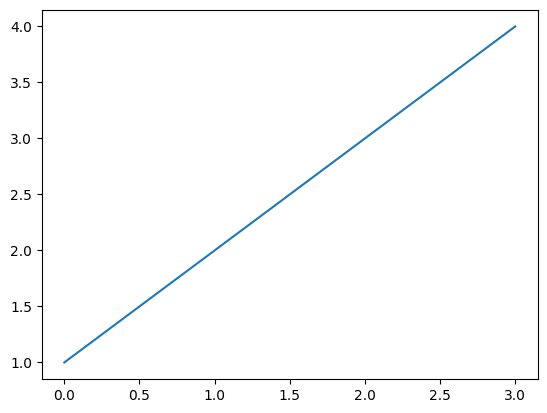

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.show()

In [2]:
x = range(0, 100)

In [3]:
#방법1
y = [v*v for v in x]
#방법2 
y = []
for v in x :
    y.append(v*v)

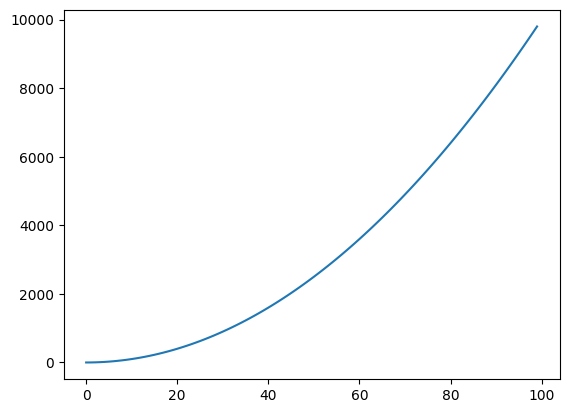

In [4]:
plt.plot(x, y)

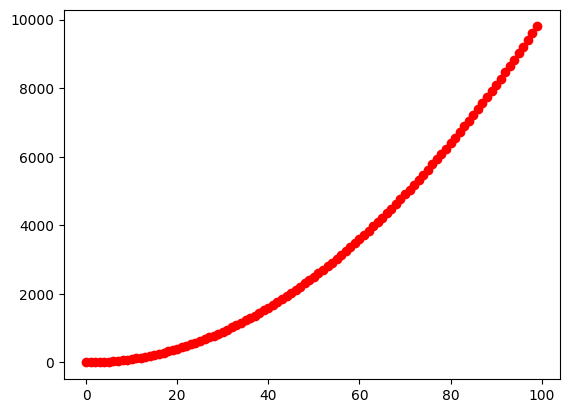

In [5]:
plt.plot(x, y, 'ro')
plt.show()

In [6]:
#상관분석하기
import numpy as np 
np.random.seed(1)
x = np.random.randint(0, 50, 500)
y = x + np.random.normal(0, 10, 500)
np.corrcoef(x, y)

array([[1.        , 0.81989877],
       [0.81989877, 1.        ]])

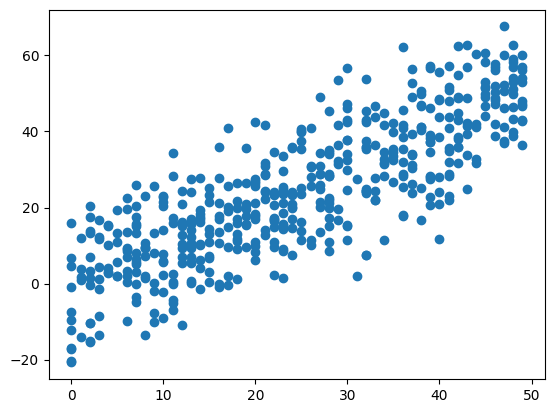

In [7]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.show()

In [8]:
#음의상관관계경우
x = np.random.randint(0, 50, 500)
y = 100 - x + np.random.normal(0, 5, 500)
np.corrcoef(x, y)

array([[ 1.        , -0.93512287],
       [-0.93512287,  1.        ]])

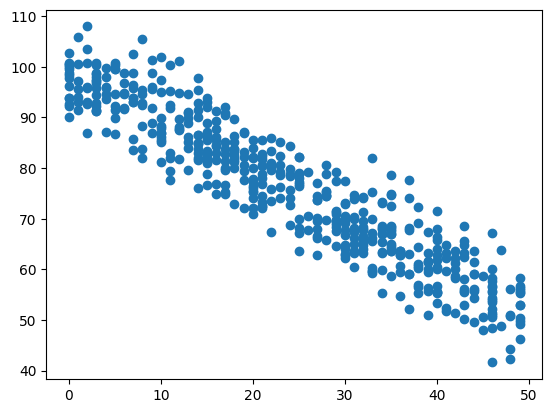

In [9]:
plt.scatter(x, y)
plt.show()

In [10]:
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

In [11]:
np.corrcoef(x, y)

array([[1.        , 0.01260581],
       [0.01260581, 1.        ]])

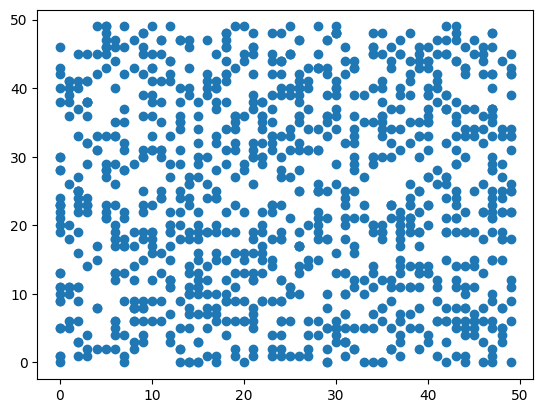

In [12]:
plt.scatter(x,y)
plt.show()

In [13]:
#주어진 데이터로 일원 분산분석하기 

In [17]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [21]:
data = np.genfromtxt('altman_910.txt', delimiter=',')
print(data)

[[243.   1.]
 [251.   1.]
 [275.   1.]
 [291.   1.]
 [347.   1.]
 [354.   1.]
 [380.   1.]
 [392.   1.]
 [206.   2.]
 [210.   2.]
 [226.   2.]
 [249.   2.]
 [255.   2.]
 [273.   2.]
 [285.   2.]
 [295.   2.]
 [309.   2.]
 [241.   3.]
 [258.   3.]
 [270.   3.]
 [293.   3.]
 [328.   3.]]


In [23]:
group1 = data[data[:, 1]==1, 0]
group2 = data[data[:, 1]==2, 0]
group3 = data[data[:, 1]==3, 0]

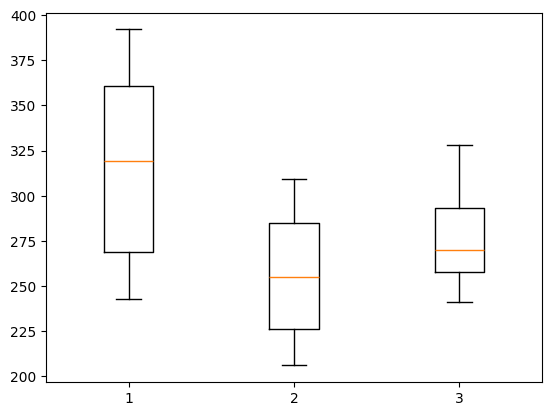

In [24]:
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [25]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=np.float64(3.7113359882669763), pvalue=np.float64(0.04358933495917824))

In [26]:
# 각 그룹쌍에 대해서 t 검정하기
print(stats.ttest_ind(group1, group2))

TtestResult(statistic=np.float64(2.5581789927784295), pvalue=np.float64(0.02184081286794004), df=np.float64(15.0))


In [27]:
# 각 그룹쌍에 대해서 t 검정하기
print(stats.ttest_ind(group1, group3))

TtestResult(statistic=np.float64(1.326611291434599), pvalue=np.float64(0.21151930405600672), df=np.float64(11.0))


In [28]:
# 각 그룹쌍에 대해서 t 검정하기
print(stats.ttest_ind(group2, group3))

TtestResult(statistic=np.float64(-1.0724508202985763), pvalue=np.float64(0.30461196197608215), df=np.float64(12.0))


In [34]:
# 위의 자료에서 그룹 1과 2의 평균값에 대해 다중비교하기
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=data[:, 0],
    groups=data[:, 1],
    alpha=0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1.0,2.0,-60.1806,0.0355,-116.619,-3.7421,True
1.0,3.0,-38.625,0.3215,-104.8404,27.5904,False
2.0,3.0,21.5556,0.6802,-43.2295,86.3406,False
